<a href="https://colab.research.google.com/github/CleonKalea/Foundation-of-Data-Science/blob/master/Tugas%201/Exploratory%20Data%20Analysis%20-%202021%20Salary%20Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis using Salary Survey 2021 Data**

## **Install and Import Required Library**

In [1]:
!pip install forex_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from forex_python.converter import CurrencyRates
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

## **Preparing the Data**

Import the Data into Pandas DataFrame

In [3]:
# URL to 2021 Salary Survey Data (Excel)
data_url = 'https://github.com/CleonKalea/Foundation-of-Data-Science/raw/master/Tugas%201/salary_survey_2021.xlsx'

# Load the Excel file and convert its contents into a DataFrame
original_df = pd.read_excel(data_url)

# Show the DataFrame
original_df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27941,2023-02-27 06:22:35.240,25-34,Computing or Tech,Sr software engineer,NaN,190000,14000.0,USD,NaN,NaN,United States,Texas,Dallas,5-7 years,5-7 years,College degree,Man,Asian or Asian American
27942,2023-03-01 09:43:37.098,45-54,Property or Construction,Property Manager,Senior,55000,13000.0,USD,NaN,NaN,United States,Ohio,Brunswick,21 - 30 years,11 - 20 years,NaN,NaN,NaN
27943,2023-03-06 18:16:18.899,25-34,Behavioral Health,Mental Health Therapist,NaN,52416,NaN,USD,NaN,NaN,USA,Virginia,Spotsylvania,2 - 4 years,2 - 4 years,Master's degree,Woman,White
27944,2023-03-09 09:11:48.506,18-24,Computing or Tech,Help Desk Associate Analyst,NaN,36000,NaN,USD,NaN,NaN,United States,Illinois,Chicago,5-7 years,2 - 4 years,College degree,Man,Black or African American


Rename the Necessary Original DataFrame Columns to Shorten the Syntax

In [4]:
original_df = original_df.rename(columns={"What is your annual salary? (You\'ll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": 'Annual Salary',
                        "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits." : "Monetary Compensation",
                        "What industry do you work in?" : "Industry",
                        "How many years of professional work experience do you have overall?" : "Work Experience Overall",
                        "How many years of professional work experience do you have in your field?" : "Work Experience in the same Field",
                        "What is your gender?" : "Gender",
                        "What is your highest level of education completed?" : "Education",
                        "Please indicate the currency" : "Currency",
                        "If \"Other,\" please indicate the currency here: " : "Other Currency",
                        "What country do you work in?" : "Country"})

original_df.iloc[0]

Timestamp                                                                   2021-04-27 11:02:09.743000
How old are you?                                                                                 25-34
Industry                                                                  Education (Higher Education)
Job title                                                           Research and Instruction Librarian
If your job title needs additional context, please clarify here:                                   NaN
Annual Salary                                                                                    55000
Monetary Compensation                                                                              0.0
Currency                                                                                           USD
Other Currency                                                                                     NaN
If your income needs additional context, please provide it here:         

Create a new DataFrame with only the necessary columns

In [5]:
salary_survey_df = pd.DataFrame(columns=['Industry', 'Work Experience Overall', 'Work Experience in the same Field', 'Country', 'Gender', 'Education', 'Total Salary', 'Currency'])
salary_survey_df

,Industry,Work Experience Overall,Work Experience in the same Field,Country,Gender,Education,Total Salary,Currency


Copy Necessary Columns Value from Original DataFrame into `salary_survey_df`

In [6]:
# Get Rows Length to Iterate
total_rows = original_df.shape[0]

# Copy Data from Original DataFrame
for i in range(total_rows):
  industry = original_df.loc[i, 'Industry']
  work_experience_overall = original_df.loc[i, 'Work Experience Overall']
  work_experience_in_the_same_field = original_df.loc[i, 'Work Experience in the same Field']
  annual_salary = original_df.loc[i, 'Annual Salary']
  monetary_compensation = original_df.loc[i, 'Monetary Compensation']
  country = original_df.loc[i, 'Country']
  currency = original_df.loc[i, 'Currency']
  gender = original_df.loc[i, 'Gender']
  education = original_df.loc[i, 'Education']

  # Set Monetary Compensation to 0 if Value is NaN
  if np.isnan(monetary_compensation):
      monetary_compensation = 0.0
  else:
      monetary_compensation = monetary_compensation

  # Sum Annual Salary and Monetary Compensation
  total_salary = annual_salary + monetary_compensation

  # Insert Data to the New DataFrame
  salary_survey_df.loc[i, 'Industry'] = industry
  salary_survey_df.loc[i, 'Work Experience Overall'] = work_experience_overall
  salary_survey_df.loc[i, 'Work Experience in the same Field'] = work_experience_in_the_same_field
  salary_survey_df.loc[i, 'Total Salary'] = total_salary
  salary_survey_df.loc[i, 'Country'] = country
  salary_survey_df.loc[i, 'Currency'] = currency
  salary_survey_df.loc[i, 'Gender'] = gender
  salary_survey_df.loc[i, 'Education'] = education

salary_survey_df

,Industry,Work Experience Overall,Work Experience in the same Field,Country,Gender,Education,Total Salary,Currency
0,Education (Higher Education),5-7 years,5-7 years,United States,Woman,Master's degree,55000.0,USD
1,Computing or Tech,8 - 10 years,5-7 years,United Kingdom,Non-binary,College degree,58600.0,GBP
2,"Accounting, Banking & Finance",2 - 4 years,2 - 4 years,US,Woman,College degree,34000.0,USD
3,Nonprofits,8 - 10 years,5-7 years,USA,Woman,College degree,65000.0,USD
4,"Accounting, Banking & Finance",8 - 10 years,5-7 years,US,Woman,College degree,67000.0,USD
...,...,...,...,...,...,...,...,...
27941,Computing or Tech,5-7 years,5-7 years,United States,Man,College degree,204000.0,USD
27942,Property or Construction,21 - 30 years,11 - 20 years,United States,NaN,NaN,68000.0,USD
27943,Behavioral Health,2 - 4 years,2 - 4 years,USA,Woman,Master's degree,52416.0,USD
27944,Computing or Tech,5-7 years,2 - 4 years,United States,Man,College degree,36000.0,USD


## **Data Cleaning**

**Checking Null Values**

In [7]:
salary_survey_df.isna().sum()

Industry                              72
Work Experience Overall                0
Work Experience in the same Field      0
Country                                0
Gender                               167
Education                            214
Total Salary                           0
Currency                               0
dtype: int64

**Cleaning Industry Data Values by Dropping Null Value**

In [8]:
null_industry_rows = salary_survey_df[salary_survey_df['Industry'].isna()]['Industry'].index
salary_survey_df.drop(null_industry_rows, inplace=True)

**Cleaning Gender Values**

In [9]:
# Scanning Unique Values in Gender
salary_survey_df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', nan, 'Other or prefer not to answer',
       'Prefer not to answer'], dtype=object)

In [10]:
# Filling Null Columns with "Prefer not to answer"
salary_survey_df['Gender'] = salary_survey_df['Gender'].fillna('Prefer not to answer')

**Cleaning Education Values**

In [11]:
# Scanning Unique Values in Education
salary_survey_df['Education'].unique()

array(["Master's degree", 'College degree', 'PhD', nan, 'Some college',
       'High School', 'Professional degree (MD, JD, etc.)'], dtype=object)

In [12]:
# Filling Null Columns with "-"
salary_survey_df['Education'] = salary_survey_df['Education'].fillna('-')

**Cleaning Currency Values**

In [13]:
# Scanning Unique Values in Currency
salary_survey_df['Currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [14]:
# Value of Each Unique Currency
group_result = original_df['Currency'].value_counts().reset_index()
print(group_result.to_string())

      index  Currency
0       USD     23288
1       CAD      1665
2       GBP      1585
3       EUR       637
4   AUD/NZD       500
5     Other       156
6       CHF        37
7       SEK        37
8       JPY        23
9       ZAR        14
10      HKD         4


In [15]:
# Rename AUD/NZD Currency to AUD
salary_survey_df['Currency'] = salary_survey_df['Currency'].replace("AUD/NZD", "AUD")

# Drop Rows with "Other" Currency Value
other_currency_rows = salary_survey_df[salary_survey_df['Currency'] == "Other"]['Currency'].index
salary_survey_df.drop(other_currency_rows, inplace=True)

# Drop Rows with Null Total Salary Value
null_total_salary_rows = salary_survey_df[salary_survey_df['Total Salary'].isna()]['Total Salary'].index
salary_survey_df.drop(null_total_salary_rows, inplace=True)

**Forex-python to get Exchange Rate**

In [16]:
# Initialize CurrencyRates object
c = CurrencyRates()

# Get all supported currencies with exchange rates relative to USD
all_currencies = c.get_rates('USD')

# Include USD in the dictionary with a value of 1
all_currencies['USD'] = 1.0

# Store the currencies and their exchange rates in a dictionary
exchange_rates = all_currencies

# Print the dictionary
for key, value in exchange_rates.items():
    print(key, value)

EUR 0.9286775631500743
JPY 150.33432392273403
BGN 1.8163075780089153
CZK 23.64413075780089
DKK 6.922919762258544
GBP 0.794994427934621
HUF 361.3763001485884
PLN 4.030460624071322
RON 4.622121099554235
SEK 10.462017087667162
CHF 0.8814078751857356
ISK 138.46582466567608
NOK 10.545598068350667
TRY 30.827544576523028
AUD 1.5338967310549776
BRL 4.973161218424963
CAD 1.348254086181278
CNY 7.193629271916791
HKD 7.8228083209509665
IDR 15636.497028231799
INR 83.00659361069837
KRW 1332.73588410104
MXN 17.044576523031203
MYR 4.780460624071322
NZD 1.638930163447251
PHP 55.96025260029718
SGD 1.3465824665676076
THB 36.059621099554235
ZAR 18.886979940564636
USD 1.0


In [17]:
# Convert All Salary to USD
for index, row in salary_survey_df.iterrows():
    currency = row['Currency']
    converted_total_salary_to_USD = row["Total Salary"] / exchange_rates[currency]
    salary_survey_df.at[index, 'Total Salary (USD)'] = converted_total_salary_to_USD
    print(f'{row["Total Salary"]} {currency} --> {converted_total_salary_to_USD} USD')


Streaming output truncated to the last 5000 lines.
72000.0 USD --> 72000.0 USD
27412.0 GBP --> 34480.74481630746 USD
22000.0 GBP --> 27673.149932831027 USD
46000.0 USD --> 46000.0 USD
76000.0 AUD --> 49547.01216928014 USD
153000.0 AUD --> 99745.9587092087 USD
131000.0 USD --> 131000.0 USD
28200.0 GBP --> 35471.94673208341 USD
54000.0 USD --> 54000.0 USD
64000.0 USD --> 64000.0 USD
57000.0 USD --> 57000.0 USD
29120.0 USD --> 29120.0 USD
50995.0 USD --> 50995.0 USD
120000.0 USD --> 120000.0 USD
52000.0 USD --> 52000.0 USD
147000.0 USD --> 147000.0 USD
42500.0 USD --> 42500.0 USD
27000.0 GBP --> 33962.502190292624 USD
60500.0 EUR --> 65146.399999999994 USD
112000.0 AUD --> 73016.64951262336 USD
105000.0 USD --> 105000.0 USD
23920.0 GBP --> 30088.26119969628 USD
19760.0 GBP --> 24855.520121488233 USD
199800.0 AUD --> 130256.4872555549 USD
72500.0 USD --> 72500.0 USD
136800.0 USD --> 136800.0 USD
42700.0 USD --> 42700.0 USD
42000.0 USD --> 42000.0 USD
13000.0 EUR --> 13998.4 USD
40249.0 USD

In [18]:
salary_survey_df.isna().sum()

Industry                             0
Work Experience Overall              0
Work Experience in the same Field    0
Country                              0
Gender                               0
Education                            0
Total Salary                         0
Currency                             0
Total Salary (USD)                   0
dtype: int64

**Data Outliers**

In [19]:
# Data Before Removing Outliers
salary_survey_df['Total Salary (USD)'].describe()

count    2.771900e+04
mean     9.996270e+04
std      6.184124e+05
min      0.000000e+00
25%      5.450000e+04
50%      7.650000e+04
75%      1.130000e+05
max      1.020000e+08
Name: Total Salary (USD), dtype: float64

**Calculating Z-Score to Remove Data Outliers**

In [20]:
# Calculate the Z-score for each data point
salary_survey_df['Z-score'] = (salary_survey_df['Total Salary (USD)'] - salary_survey_df['Total Salary (USD)'].mean()) / salary_survey_df['Total Salary (USD)'].std()

# Define the threshold for identifying outliers (e.g., z-score > 3 or z-score < -3)
z_score_threshold = 3

# Identify outliers based on the Z-score
outliers_df = salary_survey_df[(salary_survey_df['Z-score'] > z_score_threshold) | (salary_survey_df['Z-score'] < -z_score_threshold)]

# Remove outliers from the DataFrame
filtered_salary_survey_df = salary_survey_df[(salary_survey_df['Z-score'] <= z_score_threshold) & (salary_survey_df['Z-score'] >= -z_score_threshold)]

In [21]:
# DataFrame with Outliers
print("Original DataFrame:")
print(salary_survey_df)

Original DataFrame:
                            Industry Work Experience Overall  \
0       Education (Higher Education)               5-7 years   
1                  Computing or Tech            8 - 10 years   
2      Accounting, Banking & Finance             2 - 4 years   
3                         Nonprofits            8 - 10 years   
4      Accounting, Banking & Finance            8 - 10 years   
...                              ...                     ...   
27941              Computing or Tech               5-7 years   
27942       Property or Construction           21 - 30 years   
27943              Behavioral Health             2 - 4 years   
27944              Computing or Tech               5-7 years   
27945              Recruitment or HR          1 year or less   

      Work Experience in the same Field         Country                Gender  \
0                             5-7 years   United States                 Woman   
1                             5-7 years  United K

In [22]:
# DataFrame outliers
print("\nOutliers:")
print(outliers_df)


Outliers:
                             Industry Work Experience Overall  \
2124                     Art & Design           21 - 30 years   
3605   Utilities & Telecommunications            8 - 10 years   
15509               Computing or Tech           11 - 20 years   
26466                           Sales           31 - 40 years   

      Work Experience in the same Field    Country Gender        Education  \
2124                      21 - 30 years        USA  Woman  Master's degree   
3605                     1 year or less   Colombia    Man     Some college   
15509                     11 - 20 years  Singapore    Man   College degree   
26466                     21 - 30 years        Usa  Woman  Master's degree   

      Total Salary Currency  Total Salary (USD)     Z-score  
2124     3000000.0      USD           3000000.0    4.689488  
3605   102000000.0      USD         102000000.0  164.776831  
15509    2196148.0      USD           2196148.0    3.389624  
26466    5004044.0      

In [23]:
# DataFrame Without Outliers
print("\nFiltered DataFrame:")
print(filtered_salary_survey_df)


Filtered DataFrame:
                            Industry Work Experience Overall  \
0       Education (Higher Education)               5-7 years   
1                  Computing or Tech            8 - 10 years   
2      Accounting, Banking & Finance             2 - 4 years   
3                         Nonprofits            8 - 10 years   
4      Accounting, Banking & Finance            8 - 10 years   
...                              ...                     ...   
27941              Computing or Tech               5-7 years   
27942       Property or Construction           21 - 30 years   
27943              Behavioral Health             2 - 4 years   
27944              Computing or Tech               5-7 years   
27945              Recruitment or HR          1 year or less   

      Work Experience in the same Field         Country                Gender  \
0                             5-7 years   United States                 Woman   
1                             5-7 years  United 

In [24]:
# Data After Removing Outliers
filtered_salary_survey_df['Total Salary (USD)'].describe()

count    2.771500e+04
mean     9.592877e+04
std      8.045216e+04
min      0.000000e+00
25%      5.450000e+04
50%      7.650000e+04
75%      1.130000e+05
max      1.950000e+06
Name: Total Salary (USD), dtype: float64

## **Exploratory Data Analysis**

**Industry with The Largest Salary**

In [25]:
# Find the index of the maximum value in the "Total Salary (USD)" column
max_index = filtered_salary_survey_df['Total Salary (USD)'].idxmax()

# Get the corresponding value in the "Industry" column using the index
max_industry = filtered_salary_survey_df.loc[max_index, 'Industry']

# Get the corresponding value in the "Total Salary (USD) column using index"
max_salary = filtered_salary_survey_df.loc[max_index, 'Total Salary (USD)']

print("Industry with maximum Total Salary:", max_salary, "is", max_industry, "at index", max_index, "\n")

filtered_salary_survey_df.loc[max_index]

Industry with maximum Total Salary: 1950000.0 is Accounting, Banking & Finance at index 26935 



Industry                             Accounting, Banking & Finance
Work Experience Overall                              11 - 20 years
Work Experience in the same Field                    11 - 20 years
Country                                              United States
Gender                                                         Man
Education                                           College degree
Total Salary                                             1950000.0
Currency                                                       USD
Total Salary (USD)                                       1950000.0
Z-score                                                   2.991591
Name: 26935, dtype: object

**Industry with The Smallest Salary**

In [26]:
# Find the index of the minimum value in the "Total Salary (USD)" column
min_index = filtered_salary_survey_df['Total Salary (USD)'].idxmin()

# Get the corresponding value in the "Industry" column using the index
min_industry = filtered_salary_survey_df.loc[min_index, 'Industry']

# Get the corresponding value in the "Total Salary (USD) column using index"
min_salary = filtered_salary_survey_df.loc[min_index, 'Total Salary (USD)']

print("Industry with maximum Total Salary:", min_salary, "is", min_industry, "at index", min_index, "\n")

filtered_salary_survey_df.loc[min_index]

Industry with maximum Total Salary: 0.0 is Stay-at-home parent at index 8739 



Industry                             Stay-at-home parent
Work Experience Overall                    21 - 30 years
Work Experience in the same Field           8 - 10 years
Country                                               US
Gender                                             Woman
Education                                Master's degree
Total Salary                                         0.0
Currency                                             USD
Total Salary (USD)                                   0.0
Z-score                                        -0.161644
Name: 8739, dtype: object

**Maximum Salary in Each Industry**

In [27]:
max_salary_by_industry = filtered_salary_survey_df.groupby('Industry')['Total Salary (USD)'].max().reset_index()
max_salary_by_industry

,Industry,Total Salary (USD)
0,Buyer,78950.00000
1,Veterinary medicine,155000.00000
2,"""Government Relations"" (Lobbying)",65000.00000
3,Academia,66115.52000
4,Academia,28000.00000
...,...,...
1196,trade association,220000.00000
1197,trade association/membership,67100.00000
1198,veterinary biotech,99000.00000
1199,video games,28602.91574


**Minimun Salary in Each Industry**

In [28]:
min_salary_by_industry = filtered_salary_survey_df.groupby('Industry')['Total Salary (USD)'].min().reset_index()
min_salary_by_industry

,Industry,Total Salary (USD)
0,Buyer,78950.00000
1,Veterinary medicine,155000.00000
2,"""Government Relations"" (Lobbying)",65000.00000
3,Academia,17228.80000
4,Academia,28000.00000
...,...,...
1196,trade association,220000.00000
1197,trade association/membership,67100.00000
1198,veterinary biotech,99000.00000
1199,video games,28602.91574


**Impact of Work Experience on Mean Total Salary**

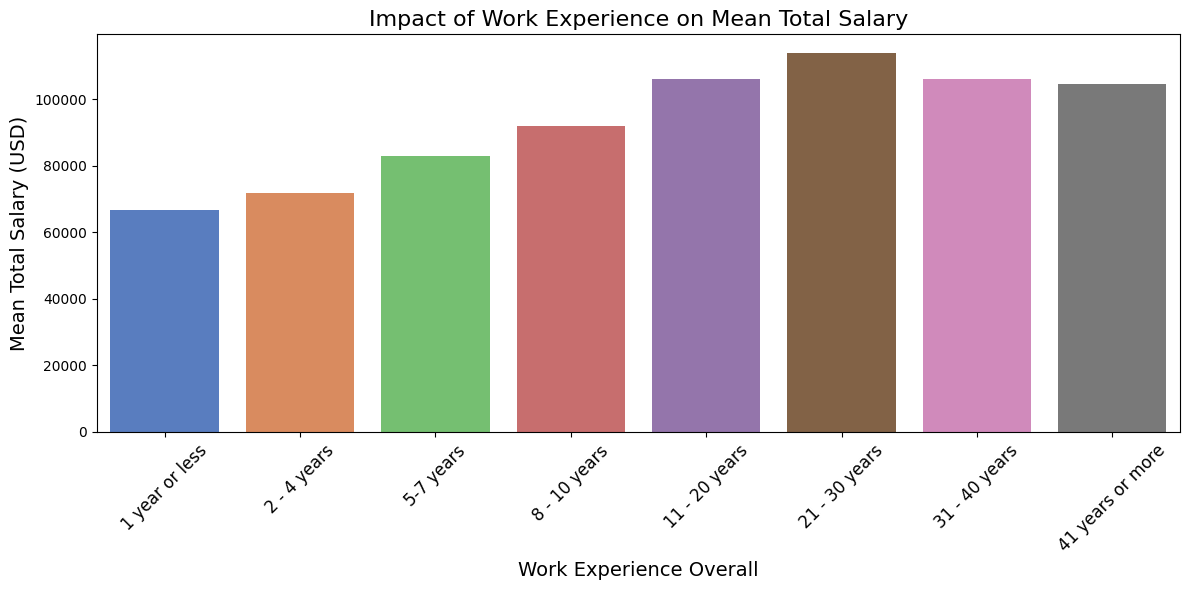

In [29]:
# Define custom sorting order
custom_order = ['1 year or less', '2 - 4 years', '5-7 years', '8 - 10 years',
                '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more']

# Calculate mean total salary for each work experience category
mean_salary_by_experience = filtered_salary_survey_df.groupby('Work Experience Overall')['Total Salary (USD)'].mean().reset_index()

# Sort the DataFrame by custom order
mean_salary_by_experience['Work Experience Overall'] = pd.Categorical(mean_salary_by_experience['Work Experience Overall'], categories=custom_order, ordered=True)
mean_salary_by_experience = mean_salary_by_experience.sort_values(by='Work Experience Overall')

# Create a bar plot
plt.figure(figsize=(12, 6))

# Use a visually appealing color palette
colors = sns.color_palette("muted")[:len(custom_order)]

# Create the bar plot with custom colors
sns.barplot(x='Work Experience Overall', y='Total Salary (USD)', data=mean_salary_by_experience, palette=colors, hue='Work Experience Overall', dodge=False, legend=False)

# Add title and axis labels with larger font size
plt.title('Impact of Work Experience on Mean Total Salary', fontsize=16)
plt.xlabel('Work Experience Overall', fontsize=14)
plt.ylabel('Mean Total Salary (USD)', fontsize=14)

# Rotate x-axis labels and set font size
plt.xticks(rotation=45, fontsize=12)

# Wrap x-axis labels into multiple lines with maximum width
plt.xticks(ticks=range(len(mean_salary_by_experience)), labels=[textwrap.fill(label, 20) for label in mean_salary_by_experience['Work Experience Overall']], rotation=45)

# Adjust the layout to ensure all elements are properly displayed
plt.tight_layout()

# Show the plot
plt.show()


**Gender on Mean Total Salary**

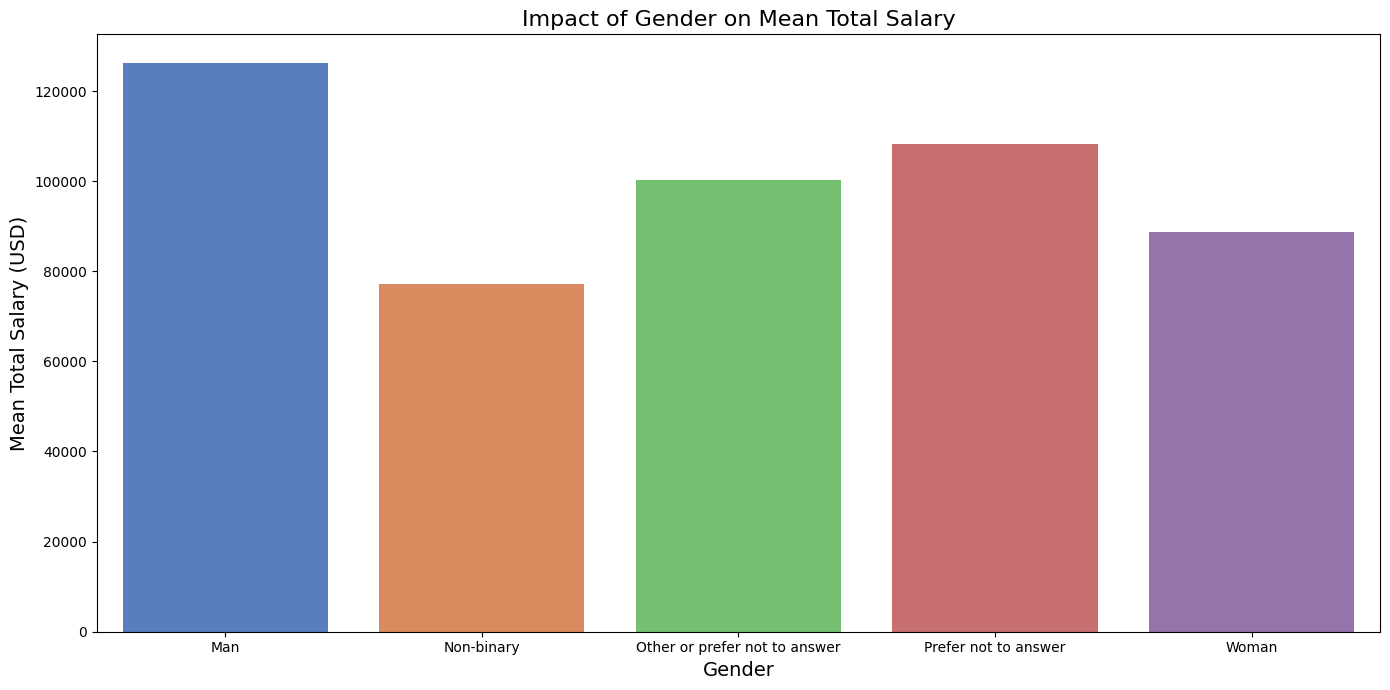

In [30]:
# Calculate mean total salary for each gender category
mean_salary_by_gender = filtered_salary_survey_df.groupby('Gender')['Total Salary (USD)'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(14, 7))

# Use a visually appealing color palette
colors = sns.color_palette("muted")[:len(mean_salary_by_gender)]

# Create the bar plot with custom colors
sns.barplot(x='Gender', y='Total Salary (USD)', data=mean_salary_by_gender, palette=colors, hue='Gender', dodge=False, legend=False)

# Add title and axis labels with larger font size
plt.title('Impact of Gender on Mean Total Salary', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Mean Total Salary (USD)', fontsize=14)

# Adjust the layout to ensure all elements are properly displayed
plt.tight_layout()

# Show the plot
plt.show()

In [31]:
filtered_salary_survey_df.groupby('Gender')['Total Salary (USD)'].mean().reset_index().sort_values(by='Total Salary (USD)')

,Gender,Total Salary (USD)
1,Non-binary,77134.642666
4,Woman,88735.659301
2,Other or prefer not to answer,100180.904525
3,Prefer not to answer,108144.312017
0,Man,126275.472086


**Education on Mean Total Salary**

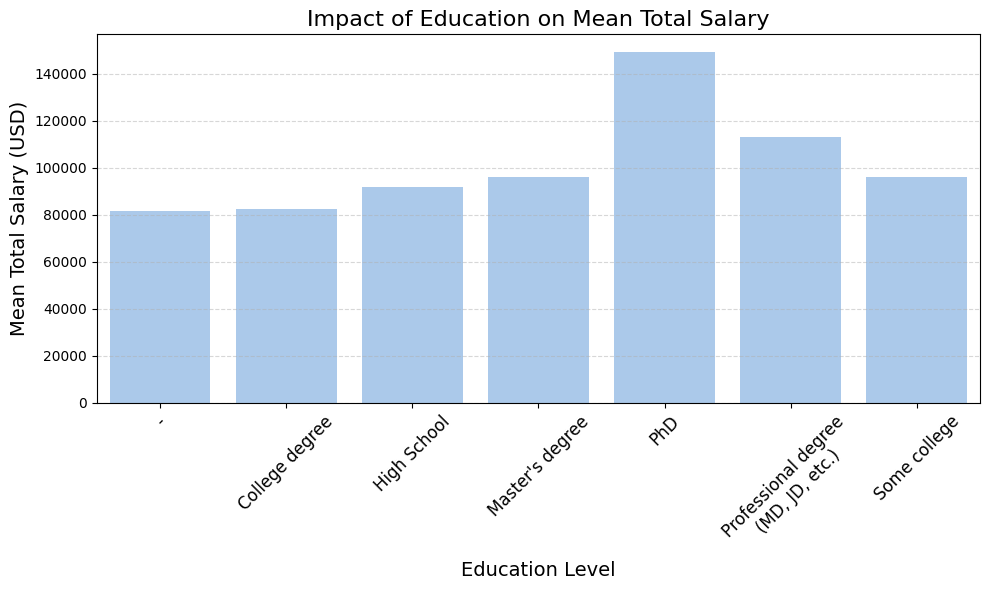

In [32]:
# Define custom sorting order
custom_order = ['High School', 'Some college', 'College degree', "Master's degree",
                'Professional degree (MD, JD, etc.)', 'PhD', '-']

# Calculate mean total salary for each education category
mean_salary_by_education = filtered_salary_survey_df.groupby('Education')['Total Salary (USD)'].mean().reset_index()

# Sort the DataFrame by custom order
mean_salary_by_education['Education Level'] = pd.Categorical(mean_salary_by_education['Education'], categories=custom_order, ordered=True)
mean_salary_by_education = mean_salary_by_education.sort_values(by='Education')

# Create a bar plot
plt.figure(figsize=(10, 6))

# Customize bar plot colors
sns.set_palette("pastel")
sns.barplot(x='Education Level', y='Total Salary (USD)', data=mean_salary_by_education)

# Add title and axis labels with custom font size
plt.title('Impact of Education on Mean Total Salary', fontsize=16)
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Mean Total Salary (USD)', fontsize=14)

# Rotate x-axis labels and set font size
plt.xticks(rotation=45, fontsize=12)

# Wrap x-axis labels into multiple lines with maximum width
plt.xticks(ticks=range(len(mean_salary_by_education)), labels=[textwrap.fill(label, 20) for label in mean_salary_by_education['Education']], rotation=45)

# Customize gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [33]:
filtered_salary_survey_df.groupby('Education')['Total Salary (USD)'].mean().reset_index().sort_values(by='Total Salary (USD)')

,Education,Total Salary (USD)
2,High School,81381.712915
6,Some college,82528.868786
1,College degree,91640.970180
3,Master's degree,95846.105012
0,-,96129.595285
4,PhD,113008.732258
5,"Professional degree (MD, JD, etc.)",149281.811425
